In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('ss.csv')

In [5]:
df.sample()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
62233,406-1184237-3510749,5/21/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0090,J0090-TP-L,Top,L,...,INR,539.0,ANTAH,RAJASTHAN,325209.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False


In [6]:
df.describe()

,Qty,Amount,ship-postal-code
count,128949.000000,121155.000000,128916.000000
mean,0.904629,648.550806,463978.298008
std,0.314782,281.218324,191473.322953
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500033.000000
75%,1.000000,788.000000,600024.000000
max,15.000000,5584.000000,989898.000000


In [7]:
df.size # how may rows and columns  are in multiple

2965827

In [8]:
df.shape

(128949, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

In [10]:
df.isnull().sum()

,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [11]:
df['Amount'].sum()

np.float64(78575172.94)

In [12]:
df.loc[df['Status'] == 'Cancelled', 'Amount'] = 0

In [13]:
df['Amount'].sum()

np.float64(71649053.62)

In [14]:
print(df[df['Status'] == 'Cancelled']['Amount'])

0         0.0
3         0.0
8         0.0
11        0.0
17        0.0
         ... 
128938    0.0
128939    0.0
128941    0.0
128943    0.0
128945    0.0
Name: Amount, Length: 18341, dtype: float64


In [15]:
df['Courier Status'].fillna('Cancelled', inplace=True)

In [16]:
df['Courier Status'].isnull().sum()

np.int64(0)

In [17]:
df['currency'].fillna('INR', inplace=True)

In [18]:
df['Courier Status'].isnull().sum()

np.int64(0)

In [19]:
print(df.loc[df['ship-city'].isna(), 'Status'])

1862                           Shipped
1863                           Shipped
8743                           Shipped
11206                          Shipped
13243                        Cancelled
15679                          Shipped
16778     Shipped - Delivered to Buyer
18342                          Shipped
22921     Shipped - Returned to Seller
24977                        Cancelled
30370     Shipped - Delivered to Buyer
37954                        Cancelled
37955                        Cancelled
60977     Shipped - Delivered to Buyer
63031                          Shipped
73666     Shipped - Delivered to Buyer
73737                          Shipped
73762                          Shipped
73763                          Shipped
73902                        Cancelled
80002     Shipped - Returned to Seller
80083                          Shipped
80446     Shipped - Delivered to Buyer
83999     Shipped - Returned to Seller
84748                          Shipped
104192    Shipped - Deliv

In [20]:
df.loc[df['Status'] == 'Cancelled', 'Amount'] = 0

In [21]:

df.loc[df['ship-city'].isna(), 'ship-city'] = 'Unknown'
df.loc[df['ship-state'].isna(), 'ship-state'] = 'Unknown'
df.loc[df['ship-postal-code'].isna(), 'ship-postal-code'] = 'Unknown'

In [22]:
df['ship-postal-code'].isnull().sum()

np.int64(0)

In [23]:
df.loc[df['ship-country'].isna(), 'ship-country'] = 'Unknown'

In [24]:
df['ship-country'].isnull().sum()

np.int64(0)

In [25]:
df.loc[df['promotion-ids'].isna(), 'promotion-ids'] = 'Amazon'

In [26]:
df.loc[df['Status'] == 'Cancelled', 'fulfilled-by'] = 'Not_Shipped'

In [27]:
df['fulfilled-by'].fillna('Easy Ship', inplace=True)

In [28]:
#Analyzing total revenue growth over time'

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [30]:
df['year_month'] = df['Date'].dt.to_period('M')

In [31]:
monthly_sales = df.groupby('year_month')['Amount'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()
print(monthly_sales)

  year_month       Amount
0 2022-03-01     94810.00
1 2022-04-01  26227884.62
2 2022-05-01  23944303.00
3 2022-06-01  21382056.00


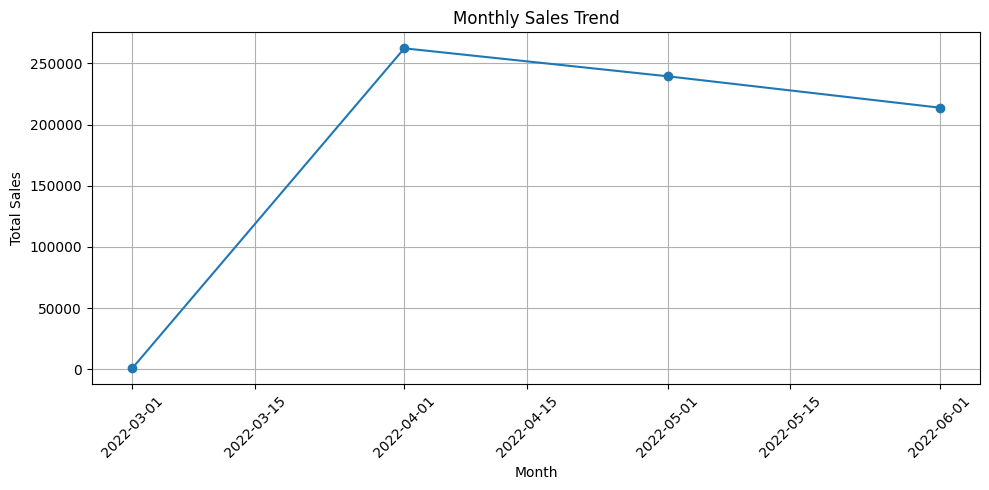

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['year_month'], monthly_sales['Amount']/100, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
best_by_revenue = df.groupby('Category')['Amount'].sum().reset_index()
best_by_revenue = best_by_revenue.sort_values('Amount', ascending=False)

print(best_by_revenue) # Best-selling by revenue

        Category       Amount
5            Set  35722907.14
8          kurta  19418762.48
7  Western Dress  10203500.00
6            Top   4902917.00
3   Ethnic Dress    731516.00
0         Blouse    418389.00
1         Bottom    135453.00
4          Saree    114694.00
2        Dupatta       915.00


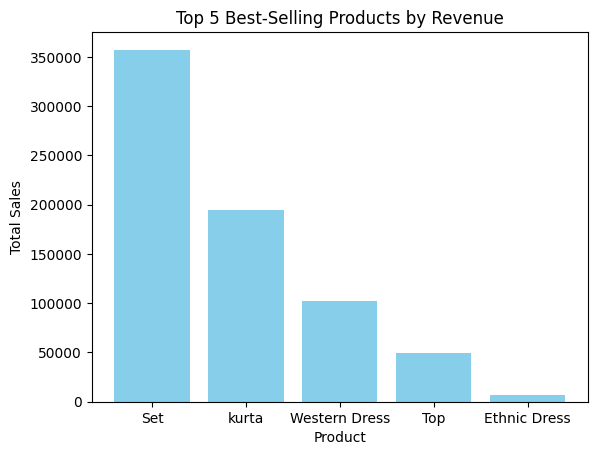

In [34]:
#Identifying best and high deemnad prodecut-selling products

top_n = best_by_revenue.head(5)

import matplotlib.pyplot as plt
plt.bar(top_n['Category'], top_n['Amount']/100, color='skyblue')
plt.title('Top 5 Best-Selling Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

In [35]:
#average order value
# to calculate the avg order value we need total total revenue /total order

In [36]:
df = df.dropna(subset=['Amount', 'Order ID', 'Date'])
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.to_period('M')

In [37]:
# Group by Month and compute AOV
monthly_aov = (
    df.groupby('Month')
    .agg({'Amount': 'sum', 'Order ID': pd.Series.nunique})
    .rename(columns={'Amount': 'Total Revenue', 'Order ID': 'Unique Orders'})
)
monthly_aov['AOV'] = monthly_aov['Total Revenue'] / monthly_aov['Unique Orders']

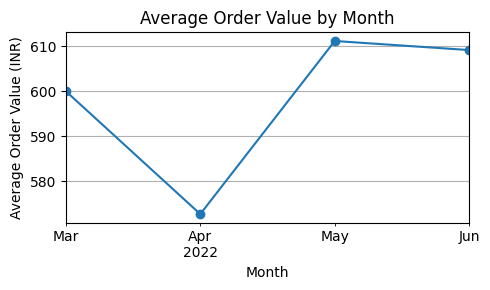

In [38]:
#average order value is
# Plot
monthly_aov['AOV'].plot(
    kind='line',
    marker='o',
    title='Average Order Value by Month',
    xlabel='Month',
    ylabel='Average Order Value (INR)',
    figsize=(5, 3),
    grid=True
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# top performing location based on sales volume

In [40]:
Location_by_revenue = df.groupby('ship-state')['Amount'].sum().reset_index()
Location_by_revenue = Location_by_revenue.sort_values('Amount', ascending=False)

In [41]:
print(Location_by_revenue)

       ship-state       Amount
28    MAHARASHTRA  12221035.00
23      KARNATAKA   9645604.00
57      TELANGANA   6289838.57
59  UTTAR PRADESH   6182323.00
56     TAMIL NADU   5952277.00
..            ...          ...
3              AR       493.00
53       Rajsthan       443.00
42             PB       399.00
2             APO         0.00
33      Meghalaya         0.00

[70 rows x 2 columns]


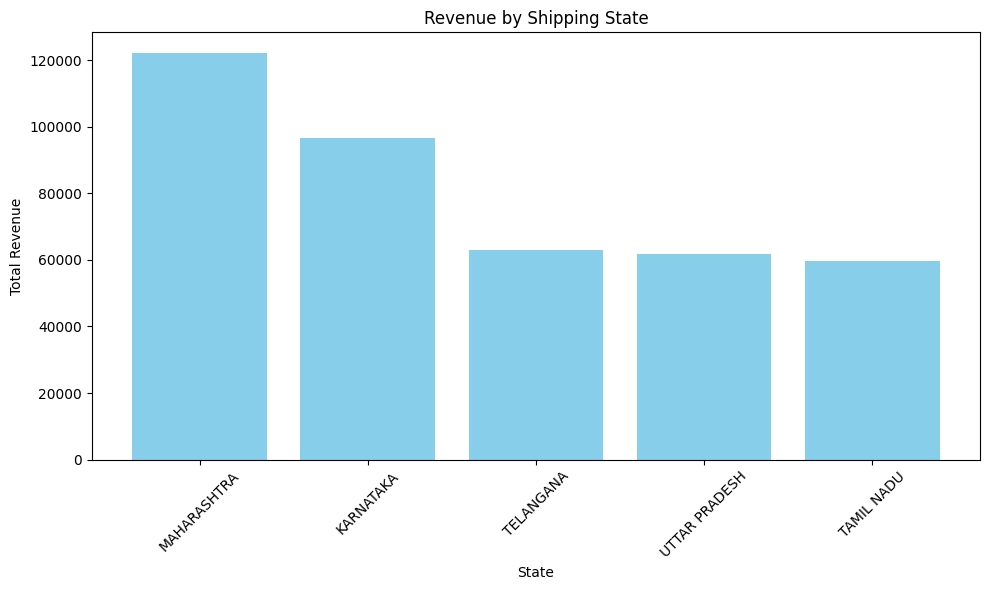

In [42]:
# Plot bar graph
plt.figure(figsize=(10, 6))  # Optional: Adjust size
plt.bar(Location_by_revenue['ship-state'].head(), (Location_by_revenue['Amount']/100).head(), color='skyblue')

# Labels and title
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.title('Revenue by Shipping State')
plt.xticks(rotation=45)  # Rotate state names for better visibility

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [43]:
order_cancellation = df[df['Status'] == 'Cancelled']


In [44]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

In [45]:
cancellation_trends = df.groupby(['Year', 'Month'])['Status'].value_counts().unstack().fillna(0)
monthly_cancellations = cancellation_trends['Cancelled'].reset_index()

In [46]:
# Step 6: Sort by Year and Month (optional, for chronological order)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_cancellations['Month'] = pd.Categorical(monthly_cancellations['Month'], categories=month_order, ordered=True)
monthly_cancellations = monthly_cancellations.sort_values(['Year', 'Month'])

In [47]:
print(cancellation_trends['Cancelled'].sort_values(ascending=False))

Year  Month
2022  April    7139.0
      May      5881.0
      June     5303.0
      March      18.0
Name: Cancelled, dtype: float64


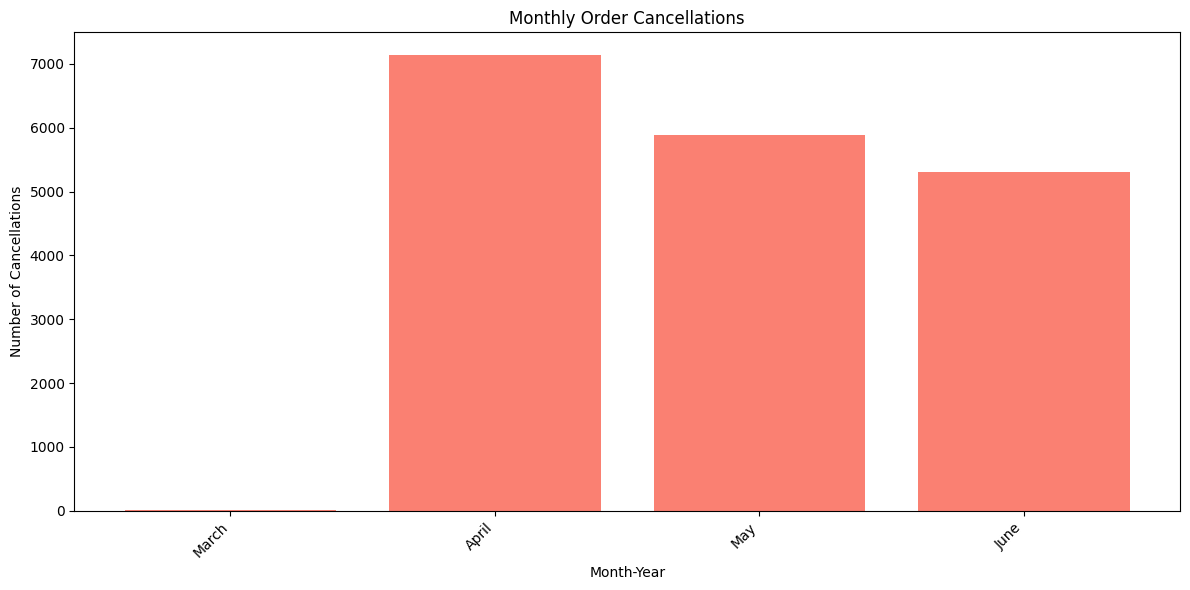

In [48]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_cancellations['Month'], monthly_cancellations['Cancelled'], color='salmon')
plt.xlabel('Month-Year')
plt.ylabel('Number of Cancellations')
plt.title('Monthly Order Cancellations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [49]:
#Differentiating B2B vs. B2C customer behavior for targeted marketing.

In [50]:
B2B_VS_B2C =df.groupby('Fulfilment')['Amount'].sum().reset_index()

In [51]:
B2B_VS_B2C_amount = B2B_VS_B2C.sort_values(by='Amount', ascending=False)

In [52]:
print(B2B_VS_B2C_amount)

  Fulfilment       Amount
0     Amazon  50573510.00
1   Merchant  21075543.62


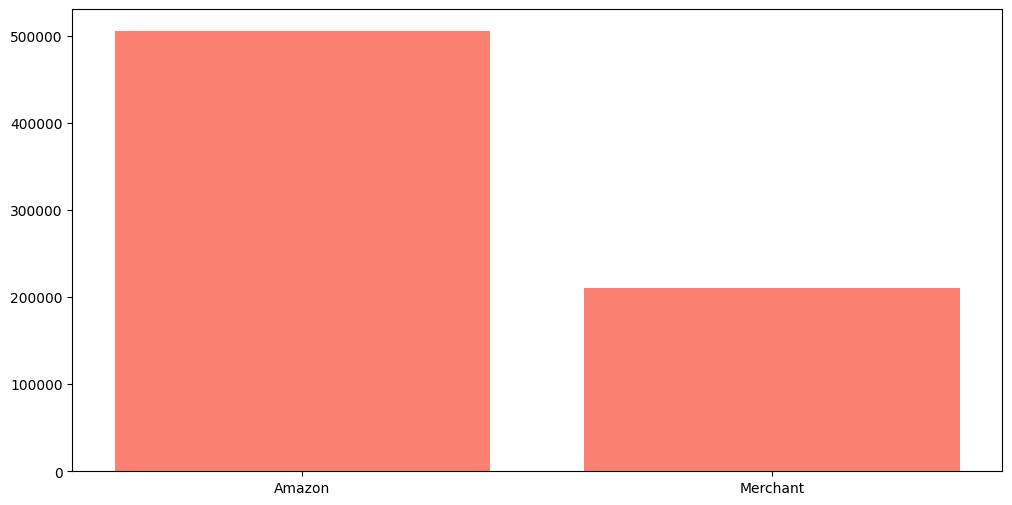

In [53]:
plt.figure(figsize=(12, 6))
plt.bar(B2B_VS_B2C['Fulfilment'], B2B_VS_B2C['Amount']/100, color='salmon')
plt.show()

#where amazon denaotes B2B AND Marchant denoates B2C also ordered fullfilled by amazon and marchant

In [54]:
df.columns = df.columns.str.strip().str.lower()

In [55]:
df = df.dropna(subset=['date', 'amount'])

In [56]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

In [57]:
df = df.dropna(subset=['date', 'amount'])


In [58]:
df['day_name'] = df['date'].dt.day_name()

In [59]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [60]:
day_sales = df.groupby(df['day_name']).agg({'amount': 'sum'}).reset_index()

In [61]:
day_sales['day_name'] = pd.Categorical(day_sales['day_name'], categories=day_order, ordered=True)
day_sales = day_sales.sort_values('day_name')

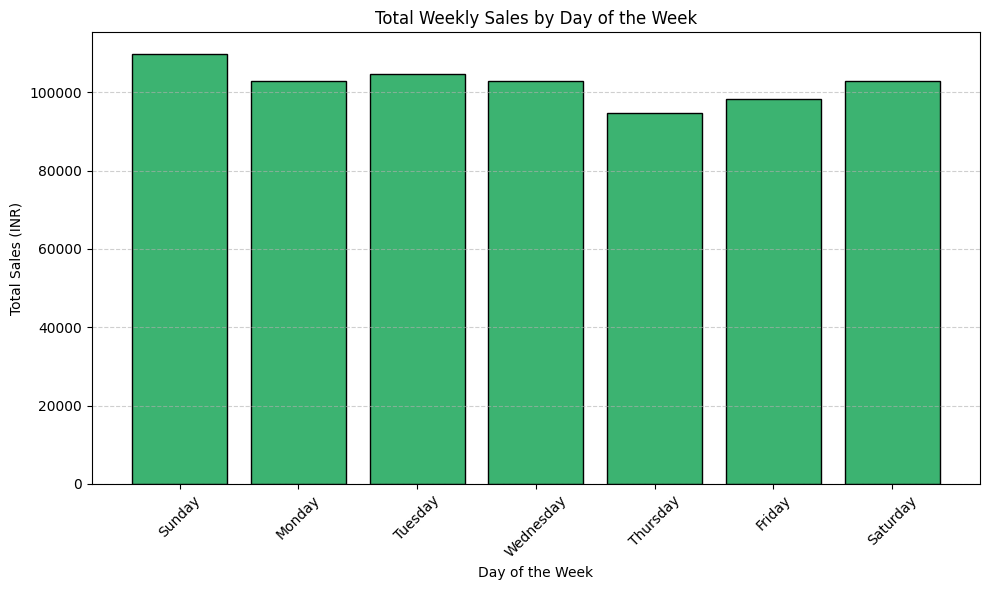

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(day_sales['day_name'], day_sales['amount']/100, color='mediumseagreen', edgecolor='black')
plt.title("Total Weekly Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales (INR)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [63]:
df = df.dropna(subset=['qty'])

In [64]:
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')

In [65]:
average_quantity = df['qty'].mean()

In [66]:
print(f"📦 Average quantity ordered: {average_quantity:.2f} units")

📦 Average quantity ordered: 0.90 units


In [67]:
#Enhancing inventory control to preventstockouts or overstocking.

In [68]:
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')

In [69]:
# Group by product to calculate total and average quantity ordered
inventory_stats = df.groupby('category')['qty'].agg(
    Total_Ordered='sum',
    Avg_Ordered='mean',
    Order_Frequency='count'
).reset_index()


In [70]:
inventory_stats = inventory_stats.sort_values(by='Total_Ordered', ascending=False)

In [71]:
print(inventory_stats.head())

        category  Total_Ordered  Avg_Ordered  Order_Frequency
5            Set          45224     0.901397            50171
8          kurta          44974     0.903709            49766
7  Western Dress          13939     0.900103            15486
6            Top           9898     0.932893            10610
3   Ethnic Dress           1052     0.909248             1157


In [72]:
#Investigating high return

In [73]:
df = df.dropna(subset=['status', 'date'])
df['date'] = pd.to_datetime(df['date'], errors='coerce')



In [74]:
df['Month'] = df['date'].dt.to_period('M')

In [75]:
# Filter for cancelled orders
cancelled_orders = df[df['status'].str.contains("Cancelled", case=False, na=False)]

In [76]:
monthly_cancelled = cancelled_orders.groupby('Month')['order id'].nunique()

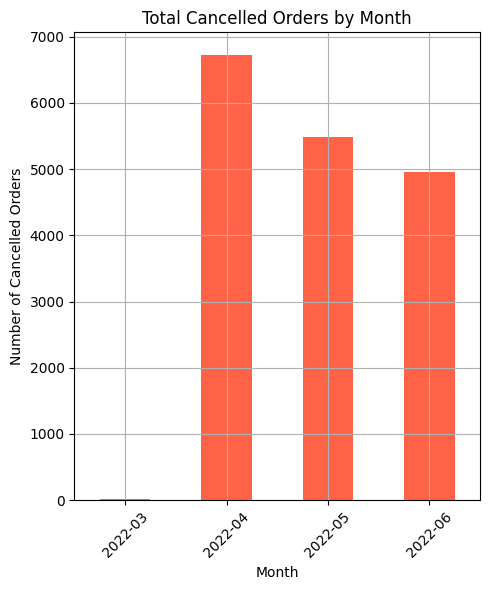

In [77]:
# Plotting
monthly_cancelled.plot(
    kind='bar',
    color='tomato',
    title='Total Cancelled Orders by Month',
    xlabel='Month',
    ylabel='Number of Cancelled Orders',
    figsize=(5, 6),
    grid=True
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
df = df.dropna(subset=['date', 'status', 'order id'])
df['Date'] = pd.to_datetime(df['date'], errors='coerce')
df['Month'] = df['date'].dt.to_period('M')

In [79]:
# Cancelled orders
cancelled = df[df['status'].str.contains("Cancelled", case=False, na=False)]
cancelled_orders = cancelled.groupby('Month')['order id'].nunique()

In [80]:
total_orders = df.groupby('Month')['order id'].nunique()

In [81]:
# Returned orders
returned = df[df['status'].str.contains("Returned", case=False, na=False)]
returned_orders = returned.groupby('Month')['order id'].nunique()

In [82]:
rates = pd.DataFrame({
    'Total Orders': total_orders,
    'Cancelled Orders': cancelled_orders,
    'Returned Orders': returned_orders
}).fillna(0)


In [83]:
# Calculate percentages
rates['Cancellation Rate (%)'] = (rates['Cancelled Orders'] / rates['Total Orders']) * 100
rates['Return Rate (%)'] = (rates['Returned Orders'] / rates['Total Orders']) * 100

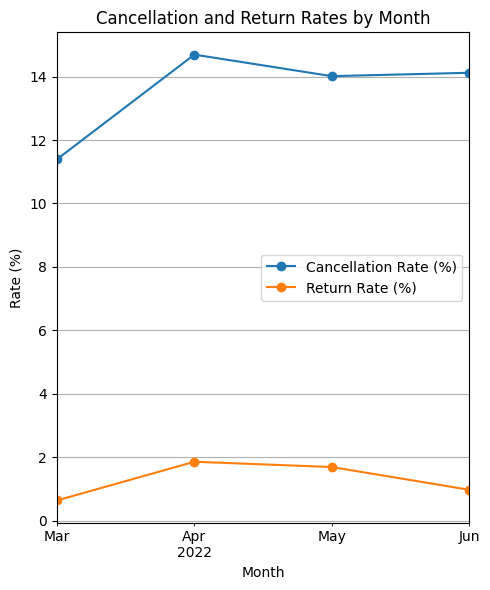

In [84]:
# Plot the rates
rates[['Cancellation Rate (%)', 'Return Rate (%)']].plot(
    kind='line',
    marker='o',
    title='Cancellation and Return Rates by Month',
    xlabel='Month',
    ylabel='Rate (%)',
    figsize=(5, 6),
    grid=True
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
df = df.dropna(subset=['amount', 'order id'])
df['Amount'] = pd.to_numeric(df['amount'], errors='coerce')

In [86]:
order_totals = df.groupby('order id')['Amount'].sum()

In [87]:
overall_aov = order_totals.mean()

In [88]:
print(f"Overall Average Order Value (AOV): ₹{overall_aov:.2f}")

Overall Average Order Value (AOV): ₹595.94


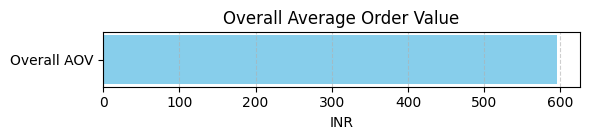

In [89]:
plt.figure(figsize=(6, 1.5))
plt.barh(['Overall AOV'], [overall_aov], color='skyblue')
plt.xlabel('INR')
plt.title('Overall Average Order Value')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [90]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

In [91]:
df = df.dropna(subset=['amount', 'order id'])

In [92]:
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df = df.dropna(subset=['amount'])

In [93]:
total_sales = df['amount'].sum()
total_orders = df['order id'].nunique()

In [94]:
overall_aov = total_sales / total_orders

In [95]:
print(f"Overall Average Order Value (AOV): ₹{overall_aov:.2f}")

Overall Average Order Value (AOV): ₹595.94


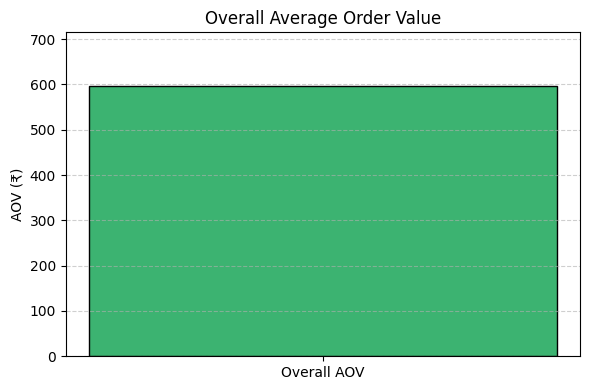

In [96]:
plt.figure(figsize=(6, 4))
plt.bar(['Overall AOV'], [overall_aov], color='mediumseagreen', edgecolor='black')
plt.title('Overall Average Order Value')
plt.ylabel('AOV (₹)')
plt.ylim(0, overall_aov * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [97]:
df["amount"].sum()

np.float64(71649053.62)

**Conculsion**:
"Cancelled" and "Returned" orders appear frequently so we need to .

Some months show high cancellation rates, especially via merchant fulfillment.

**Fulfillment Performance**

Mixed performance between "Amazon" and "Merchant" fulfillment.

"Merchant" fulfilled orders have higher instances of cancellations.

**Category-Level Issues**
Categories like kurta, top, and set dominate.

Some categories may correlate with higher return or lower AOV.


**Geographic Distribution**
Top shipping states include Maharashtra, Karnataka, and Tamil Nadu.

Slight delays and higher cancellations may be localized to specific regions.


Sales Strategy **bold text**
Boost AOV by offering product bundles, free shipping thresholds, or upselling.

Run targeted category-level promotions for low-performing items.



My Suggestion


Promote bundles or combos to increase order value (e.g., kurta + pant + dupatta).

Encourage larger orders by offering free shipping above a certain amount.


Cross-sell and upsell using customer preferences (e.g., show matching products).


Focus on top-selling categories, reduce low performers


**Improve Product Listings:**

Use high-quality images and accurate descriptions.

Clearly display size charts to reduce size-related returns.

Be transparent to set correct customer expectations.


Improve Merchant Fulfillment SOP:

Faster dispatch times.

Standardize packaging and labeling.



Weekly & Monthly Dashboards:

Sales, returns, cancellations, and top SKUs by time.